# Boston House Price Prediction

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load the dataset

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(data_url, header=None, sep=',', skiprows=1, names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Inspect the dataset

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [4]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## Handle missing values (if any)

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

For this dataset, there are no missing values.

## Perform feature scaling and normalization

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('MEDV', axis=1))

In [7]:
scaled_features.shape

(506, 13)

In [8]:
scaled_features.max()

9.933930601860267

## Convert scaled features back to a DataFrame

In [9]:
df_scaled = pd.DataFrame(scaled_features, columns=column_names[:-1])
df_scaled['MEDV'] = df['MEDV']

In [10]:
df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


## Split the data into training and testing sets

In [11]:
X = df_scaled.drop('MEDV', axis=1)
y = df_scaled['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [12]:
X_train.shape, y_train.shape

((455, 13), (455,))

## Implement a simple Linear Regression model

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict on the testing set

In [14]:
y_pred = model.predict(X_test)

## Evaluate the model

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score : {r2}")

Mean Absolute Error: 4.170177848390395
Mean Squared Error: 29.97126820089663
Root Mean Squared Error: 5.474602104344811
R2 Score : 0.7585295159810996


## Visualize the model's performance

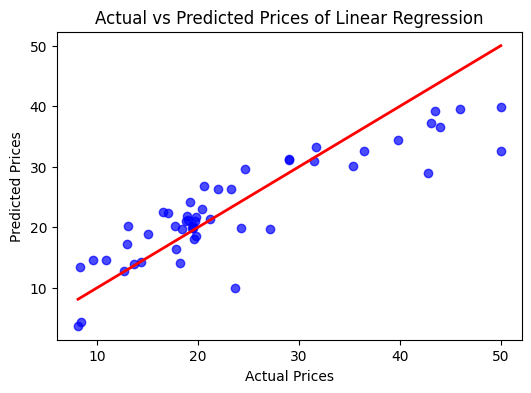

In [32]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices of Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.show()

## Interpret the model's coefficients


In [17]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

         Coefficient
CRIM       -0.839748
ZN          0.933673
INDUS       0.012553
CHAS        0.559760
NOX        -1.933738
RM          2.377185
AGE         0.327869
DIS        -3.018207
RAD         2.482937
TAX        -1.907197
PTRATIO    -2.102303
B           0.812249
LSTAT      -4.097571


## Build the ANN model

In [18]:
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(1))

## Compile the model

In [19]:
model2.compile(optimizer='adam', loss='mean_squared_error')

## Train the model

In [20]:
history = model2.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
12/12 [==============================] - 3s 43ms/step - loss: 566.0571 - val_loss: 626.8582
Epoch 2/200
12/12 [==============================] - 0s 13ms/step - loss: 538.5746 - val_loss: 600.9695
Epoch 3/200
12/12 [==============================] - 0s 14ms/step - loss: 511.5504 - val_loss: 569.5167
Epoch 4/200
12/12 [==============================] - 0s 13ms/step - loss: 479.0576 - val_loss: 528.2455
Epoch 5/200
12/12 [==============================] - 0s 13ms/step - loss: 437.8933 - val_loss: 474.9580
Epoch 6/200
12/12 [==============================] - 0s 12ms/step - loss: 386.5643 - val_loss: 408.5142
Epoch 7/200
12/12 [==============================] - 0s 13ms/step - loss: 324.8845 - val_loss: 328.6676
Epoch 8/200
12/12 [==============================] - 0s 13ms/step - loss: 257.4322 - val_loss: 239.8948
Epoch 9/200
12/12 [==============================] - 0s 14ms/step - loss: 187.2489 - val_loss: 156.8614
Epoch 10/200
12/12 [==============================] - 0s 13ms/st

Epoch 81/200
12/12 [==============================] - 0s 12ms/step - loss: 10.5670 - val_loss: 5.7002
Epoch 82/200
12/12 [==============================] - 0s 14ms/step - loss: 10.5317 - val_loss: 5.8260
Epoch 83/200
12/12 [==============================] - 0s 13ms/step - loss: 10.4320 - val_loss: 5.8363
Epoch 84/200
12/12 [==============================] - 0s 13ms/step - loss: 10.3484 - val_loss: 5.9319
Epoch 85/200
12/12 [==============================] - 0s 12ms/step - loss: 10.2717 - val_loss: 5.7294
Epoch 86/200
12/12 [==============================] - 0s 12ms/step - loss: 10.2071 - val_loss: 5.7365
Epoch 87/200
12/12 [==============================] - 0s 13ms/step - loss: 10.4345 - val_loss: 5.7590
Epoch 88/200
12/12 [==============================] - 0s 13ms/step - loss: 10.1008 - val_loss: 5.5563
Epoch 89/200
12/12 [==============================] - 0s 13ms/step - loss: 10.0432 - val_loss: 5.6893
Epoch 90/200
12/12 [==============================] - 0s 13ms/step - loss: 9.9502 

12/12 [==============================] - 0s 12ms/step - loss: 6.7565 - val_loss: 5.2690
Epoch 162/200
12/12 [==============================] - 0s 12ms/step - loss: 6.7372 - val_loss: 5.3333
Epoch 163/200
12/12 [==============================] - 0s 13ms/step - loss: 6.5916 - val_loss: 5.1134
Epoch 164/200
12/12 [==============================] - 0s 13ms/step - loss: 6.5799 - val_loss: 5.2459
Epoch 165/200
12/12 [==============================] - 0s 13ms/step - loss: 6.5021 - val_loss: 5.4623
Epoch 166/200
12/12 [==============================] - 0s 12ms/step - loss: 6.5288 - val_loss: 5.3112
Epoch 167/200
12/12 [==============================] - 0s 12ms/step - loss: 6.5101 - val_loss: 5.0494
Epoch 168/200
12/12 [==============================] - 0s 12ms/step - loss: 6.4725 - val_loss: 5.2527
Epoch 169/200
12/12 [==============================] - 0s 14ms/step - loss: 6.3766 - val_loss: 5.1057
Epoch 170/200
12/12 [==============================] - 0s 13ms/step - loss: 6.4057 - val_loss: 5

## Performance Test

In [24]:
y_pred2 = model2.predict(X_test)
maeAnn = mean_absolute_error(y_test, y_pred2)
mseAnn = mean_squared_error(y_test, y_pred2)
r2Ann = r2_score(y_test, y_pred2)
rmseAnn = np.sqrt(mseAnn)
print(f"Mean Absolute Error: {maeAnn}")
print(f"Mean Squared Error: {mseAnn}")
print(f"Root Mean Squared Error: {rmseAnn}")
print(f"R2 Score : {r2Ann}")

2/2 [==============================] - 0s 5ms/step
Mean Absolute Error: 2.190230147043864
Mean Squared Error: 7.726495967614846
Root Mean Squared Error: 2.779657527037251
R2 Score : 0.9377496905181268


## Visualize the model's performance

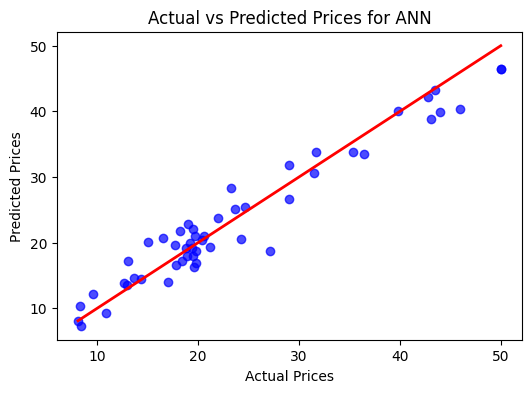

In [33]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred2, alpha=0.7, color='b')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices for ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.show()

## Documentation Report

In [26]:
report = f"""
### Housing Prices Prediction Report

#### Dataset and Features
The dataset contains 14 features including the target variable 'MEDV' which represents the median value of owner-occupied homes in $1000's. The features include:
- CRIM: Per capita crime rate by town.
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: Proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
- NOX: Nitric oxides concentration (parts per 10 million).
- RM: Average number of rooms per dwelling.
- AGE: Proportion of owner-occupied units built prior to 1940.
- DIS: Weighted distances to five Boston employment centers.
- RAD: Index of accessibility to radial highways.
- TAX: Full-value property tax rate per $10,000.
- PTRATIO: Pupil-teacher ratio by town.
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town.
- LSTAT: Percentage of lower status of the population.
- MEDV: Median value of owner-occupied homes in $1000's.

#### Data Preprocessing Steps
1. Loaded and inspected the dataset.
2. No missing values were found in the dataset.
3. Performed feature scaling and normalization using StandardScaler.
4. Split the data into training and testing sets (80% training, 20% testing).

#### Model Training and Evaluation
- Implemented a simple Linear Regression model.
- Trained the model on the training dataset.
- Also Implemented an Artificial Neural Network (ANN) model with two hidden layers.
- Trained the model on the training dataset.
- Evaluated both the models using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

#### Linear Regression Performance
- Mean Absolute Error: {mae}
- Mean Squared Error: {mse}
- Root Mean Squared Error: {rmse}
- R2 Score : {r2}

#### Artificial Neural Network Performance
- Mean Absolute Error: {maeAnn}
- Mean Squared Error: {mseAnn}
- Root Mean Squared Error: {rmseAnn}
- R2 Score : {r2Ann}

#### Interpretation of Coefficients
The coefficients of the linear regression model provide insights into the impact of each feature on the housing prices. A positive coefficient indicates that an increase in the feature value leads to an increase in the predicted price, while a negative coefficient indicates a decrease.

#### Challenges Faced
- Ensuring proper feature scaling and normalization.
- Splitting the data in a manner that maintains the distribution of the target variable.

#### Conclusion
The ANN model provides a baseline for predicting housing prices with a more complex structure than linear regression. Future improvements can include further tuning of the model architecture, performing feature engineering, and hyperparameter tuning to enhance model performance.
"""

print(report)


### Housing Prices Prediction Report

#### Dataset and Features
The dataset contains 14 features including the target variable 'MEDV' which represents the median value of owner-occupied homes in $1000's. The features include:
- CRIM: Per capita crime rate by town.
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: Proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
- NOX: Nitric oxides concentration (parts per 10 million).
- RM: Average number of rooms per dwelling.
- AGE: Proportion of owner-occupied units built prior to 1940.
- DIS: Weighted distances to five Boston employment centers.
- RAD: Index of accessibility to radial highways.
- TAX: Full-value property tax rate per $10,000.
- PTRATIO: Pupil-teacher ratio by town.
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town.
- LSTAT: Percentage of lower status of the population.
- MEDV: Median value of own